### Enhancing Data Center Operations With Machine Learning Addressing Missing Resource Usage DAta 
### Import Library FIles

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [2]:
df1 = pd.read_csv("grading_jobs_misisng_data.csv")
df1

,job_id,host,timestamp,block,cpuuser,gpu_usage,memused,memused_minus_diskcache,nfs,ts_delta,row_id
0,JOB1232062,NODE192,2023-05-30 18:50:48,1.271370e-07,15.072489,67.25,95.409138,74.828690,1.716492,120.0,562981
1,JOB1232062,NODE192,2023-05-30 18:52:48,1.271802e-07,15.532446,59.75,92.002674,71.204014,2.070351,120.0,562982
2,JOB1232062,NODE192,2023-05-30 18:54:48,1.271531e-07,13.825990,59.00,84.800064,61.181705,2.138121,120.0,562983
3,JOB1232062,NODE192,2023-05-30 18:56:48,1.271408e-07,14.134709,57.00,91.599838,65.980556,2.082333,120.0,562984
4,JOB1232062,NODE192,2023-05-30 18:58:48,NaN,NaN,NaN,NaN,NaN,NaN,120.0,562985
...,...,...,...,...,...,...,...,...,...,...,...
29764,JOB985502,NODE185,2023-04-29 22:42:01,NaN,NaN,NaN,NaN,NaN,NaN,120.0,3108386
29765,JOB985502,NODE185,2023-04-29 22:44:01,NaN,NaN,NaN,NaN,NaN,NaN,120.0,3108387
29766,JOB985502,NODE185,2023-04-29 22:46:01,NaN,NaN,NaN,NaN,NaN,NaN,120.0,3108388
29767,JOB985502,NODE185,2023-04-29 22:48:01,NaN,NaN,NaN,NaN,NaN,NaN,120.0,3108389


In [3]:
df2 = pd.read_csv("participant_test_jobs_full_data.csv")
df2

,job_id,host,timestamp,block,cpuuser,gpu_usage,memused,memused_minus_diskcache,nfs,ts_delta
0,JOB1109704,NODE185,2023-04-17 16:59:02,1.271687e-07,4.381905,34.50,40.534943,19.652592,0.000000,120.0
1,JOB1109704,NODE185,2023-04-17 17:01:02,1.049004e-06,2.821203,10.50,40.664471,19.783344,0.002425,120.0
2,JOB1109704,NODE185,2023-04-17 17:03:02,1.906899e-07,1.632220,0.00,40.804504,19.631336,0.007272,120.0
3,JOB1109704,NODE185,2023-04-17 17:05:02,1.017428e-06,4.333848,53.25,40.565411,19.682098,0.000000,120.0
4,JOB1109704,NODE185,2023-04-17 17:07:02,1.271308e-07,4.367900,0.00,40.862621,19.707119,0.000000,120.0
...,...,...,...,...,...,...,...,...,...,...
23688,JOB987177,NODE193,2023-04-29 19:51:01,1.907246e-07,9.414932,70.25,42.045948,20.688148,0.000000,120.0
23689,JOB987177,NODE193,2023-04-29 19:53:01,2.066381e-06,8.755596,72.75,42.030098,20.671711,0.009699,120.0
23690,JOB987177,NODE193,2023-04-29 19:55:01,1.271519e-07,9.402150,75.50,42.055687,20.697903,0.000000,120.0
23691,JOB987177,NODE193,2023-04-29 19:57:01,1.271590e-07,9.415855,72.50,42.064030,20.706787,0.000000,120.0


In [4]:
df3 = pd.read_csv("participant_test_jobs_missing_data.csv")
df3

,job_id,host,timestamp,block,cpuuser,gpu_usage,memused,memused_minus_diskcache,nfs,ts_delta
0,JOB1109704,NODE185,2023-04-17 16:59:02,NaN,NaN,NaN,NaN,NaN,NaN,120.0
1,JOB1109704,NODE185,2023-04-17 17:01:02,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2,JOB1109704,NODE185,2023-04-17 17:03:02,NaN,NaN,NaN,NaN,NaN,NaN,120.0
3,JOB1109704,NODE185,2023-04-17 17:05:02,NaN,NaN,NaN,NaN,NaN,NaN,120.0
4,JOB1109704,NODE185,2023-04-17 17:07:02,1.271308e-07,4.367900,0.00,40.862621,19.707119,0.0,120.0
...,...,...,...,...,...,...,...,...,...,...
23688,JOB987177,NODE193,2023-04-29 19:51:01,NaN,NaN,NaN,NaN,NaN,NaN,120.0
23689,JOB987177,NODE193,2023-04-29 19:53:01,NaN,NaN,NaN,NaN,NaN,NaN,120.0
23690,JOB987177,NODE193,2023-04-29 19:55:01,NaN,NaN,NaN,NaN,NaN,NaN,120.0
23691,JOB987177,NODE193,2023-04-29 19:57:01,1.271590e-07,9.415855,72.50,42.064030,20.706787,0.0,120.0


In [5]:
df4 = pd.read_csv("participant_training_jobs_full_data.csv")
df4

,job_id,host,timestamp,block,cpuuser,gpu_usage,memused,memused_minus_diskcache,nfs,ts_delta
0,JOB1109396,NODE205,2023-04-17 19:29:45,1.271719e-07,0.983862,25.75,52.773819,29.679924,0.001362,120.0
1,JOB1109396,NODE205,2023-04-17 19:31:45,1.271563e-07,0.997648,25.75,52.778297,29.692139,0.002496,120.0
2,JOB1109396,NODE205,2023-04-17 19:33:45,1.271542e-07,0.980974,25.75,52.796959,29.710598,0.000349,120.0
3,JOB1109396,NODE205,2023-04-17 19:35:45,1.271386e-07,0.981862,21.75,52.806320,29.719990,0.000882,120.0
4,JOB1109396,NODE205,2023-04-17 19:37:45,1.271389e-07,0.983043,25.75,52.803066,29.715981,0.000340,120.0
...,...,...,...,...,...,...,...,...,...,...
94837,JOB985834,NODE193,2023-04-29 22:29:01,1.271627e-07,18.044166,46.25,31.471375,15.548111,0.000000,120.0
94838,JOB985834,NODE193,2023-04-29 22:31:01,1.271551e-07,17.990083,45.75,31.480049,15.556564,0.000000,120.0
94839,JOB985834,NODE193,2023-04-29 22:33:01,9.536733e-08,18.010419,47.50,31.494148,15.570976,0.000000,120.0
94840,JOB985834,NODE193,2023-04-29 22:35:01,1.271552e-07,18.008077,45.25,31.506550,15.582962,0.000000,120.0


### Dataset Overview 

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29769 entries, 0 to 29768
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   job_id                   29769 non-null  object 
 1   host                     29769 non-null  object 
 2   timestamp                29769 non-null  object 
 3   block                    18690 non-null  float64
 4   cpuuser                  18690 non-null  float64
 5   gpu_usage                18690 non-null  float64
 6   memused                  18690 non-null  float64
 7   memused_minus_diskcache  18690 non-null  float64
 8   nfs                      18690 non-null  float64
 9   ts_delta                 29769 non-null  float64
 10  row_id                   29769 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 2.5+ MB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23693 entries, 0 to 23692
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   job_id                   23693 non-null  object 
 1   host                     23693 non-null  object 
 2   timestamp                23693 non-null  object 
 3   block                    23693 non-null  float64
 4   cpuuser                  23693 non-null  float64
 5   gpu_usage                23693 non-null  float64
 6   memused                  23693 non-null  float64
 7   memused_minus_diskcache  23693 non-null  float64
 8   nfs                      23693 non-null  float64
 9   ts_delta                 23693 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.8+ MB


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23693 entries, 0 to 23692
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   job_id                   23693 non-null  object 
 1   host                     23693 non-null  object 
 2   timestamp                23693 non-null  object 
 3   block                    14928 non-null  float64
 4   cpuuser                  14928 non-null  float64
 5   gpu_usage                14928 non-null  float64
 6   memused                  14928 non-null  float64
 7   memused_minus_diskcache  14928 non-null  float64
 8   nfs                      14928 non-null  float64
 9   ts_delta                 23693 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.8+ MB


In [9]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94842 entries, 0 to 94841
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   job_id                   94842 non-null  object 
 1   host                     94842 non-null  object 
 2   timestamp                94842 non-null  object 
 3   block                    94842 non-null  float64
 4   cpuuser                  94842 non-null  float64
 5   gpu_usage                94842 non-null  float64
 6   memused                  94842 non-null  float64
 7   memused_minus_diskcache  94842 non-null  float64
 8   nfs                      94842 non-null  float64
 9   ts_delta                 94842 non-null  float64
dtypes: float64(7), object(3)
memory usage: 7.2+ MB


### Data Preprocessing

In [10]:
# Standardize column names (optional but recommended to avoid mismatches)
df1.columns = df1.columns.str.strip().str.lower()
df2.columns = df2.columns.str.strip().str.lower()
df3.columns = df3.columns.str.strip().str.lower()
df4.columns = df4.columns.str.strip().str.lower()

In [11]:
# Concatenate all datasets along the rows
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Drop duplicate rows if any
merged_df.drop_duplicates(inplace=True)

# Handle missing values (example: fill with mean, median, or specific strategy)
merged_df['block'] = merged_df['block'].fillna(merged_df['block'].median())
merged_df['cpuuser'] = merged_df['cpuuser'].fillna(merged_df['cpuuser'].median())
merged_df['gpu_usage'] = merged_df['gpu_usage'].fillna(merged_df['gpu_usage'].median())
merged_df['memused'] = merged_df['memused'].fillna(merged_df['memused'].median())
merged_df['memused_minus_diskcache'] = merged_df['memused_minus_diskcache'].fillna(merged_df['memused_minus_diskcache'].median())
merged_df['nfs'] = merged_df['nfs'].fillna(merged_df['nfs'].median())

# Optional: Reorder the dataset based on `timestamp` for chronological analysis
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])
merged_df.sort_values(by='timestamp', inplace=True)

# Reset the index after merging and sorting
merged_df.reset_index(drop=True, inplace=True)

In [12]:
# Save the merged dataset to a new CSV file (optional)
merged_df.to_csv('merged_dataset.csv', index=False)

In [13]:
dataset = pd.read_csv("merged_dataset.csv")
dataset

,job_id,host,timestamp,block,cpuuser,gpu_usage,memused,memused_minus_diskcache,nfs,ts_delta,row_id
0,JOB46922,NODE104,2022-07-01 23:24:02,2.543145e-07,3.134309,71.75,40.194843,27.106098,0.000031,120.0,NaN
1,JOB46922,NODE104,2022-07-01 23:24:02,1.462301e-06,1.204557,21.75,40.036545,19.086842,21.489166,120.0,NaN
2,JOB46921,NODE91,2022-07-01 23:25:02,2.543154e-07,0.019987,0.00,27.104160,12.669407,0.000000,120.0,NaN
3,JOB46922,NODE104,2022-07-01 23:26:02,2.543145e-07,3.134309,71.75,40.194843,27.106098,0.000031,120.0,NaN
4,JOB46922,NODE104,2022-07-01 23:26:02,6.993630e-07,1.151109,21.50,40.037739,19.088451,3.970290,120.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
157064,JOB1232062,NODE192,2023-05-30 20:54:48,2.543145e-07,3.134309,71.75,40.194843,27.106098,0.000031,120.0,563043.0
157065,JOB1232062,NODE192,2023-05-30 20:56:48,2.543145e-07,3.134309,71.75,40.194843,27.106098,0.000031,120.0,563044.0
157066,JOB1232062,NODE192,2023-05-30 20:58:48,2.543145e-07,3.134309,71.75,40.194843,27.106098,0.000031,120.0,563045.0
157067,JOB1232062,NODE192,2023-05-30 21:00:48,1.271912e-07,11.487501,24.25,101.943092,58.602039,0.093587,120.0,563046.0


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157069 entries, 0 to 157068
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   job_id                   157069 non-null  object 
 1   host                     157069 non-null  object 
 2   timestamp                157069 non-null  object 
 3   block                    157069 non-null  float64
 4   cpuuser                  157069 non-null  float64
 5   gpu_usage                157069 non-null  float64
 6   memused                  157069 non-null  float64
 7   memused_minus_diskcache  157069 non-null  float64
 8   nfs                      157069 non-null  float64
 9   ts_delta                 157069 non-null  float64
 10  row_id                   29769 non-null   float64
dtypes: float64(8), object(3)
memory usage: 13.2+ MB


In [15]:
from sklearn.preprocessing import StandardScaler


# Step 1: Handle missing values
# 'row_id' has many missing values; decide its relevance. For now, drop it.
dataset.drop(columns=['row_id'], inplace=True)

# Fill or drop rows with missing values (other columns have no nulls based on the provided info)
dataset.fillna(method='ffill', inplace=True)

# Step 2: Convert 'timestamp' to a datetime object
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

# Step 3: Feature engineering (if needed)
# Add a new column for the hour of the day from the timestamp
dataset['hour'] = dataset['timestamp'].dt.hour

# Step 4: Remove duplicate rows
dataset.drop_duplicates(inplace=True)

# Step 5: Scale numerical features
# Identify numerical columns
numerical_columns = ['block', 'cpuuser', 'gpu_usage', 'memused', 'memused_minus_diskcache', 'nfs', 'ts_delta']
scaler = StandardScaler()
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])


### Expolatory Data Analysis ( EDA )

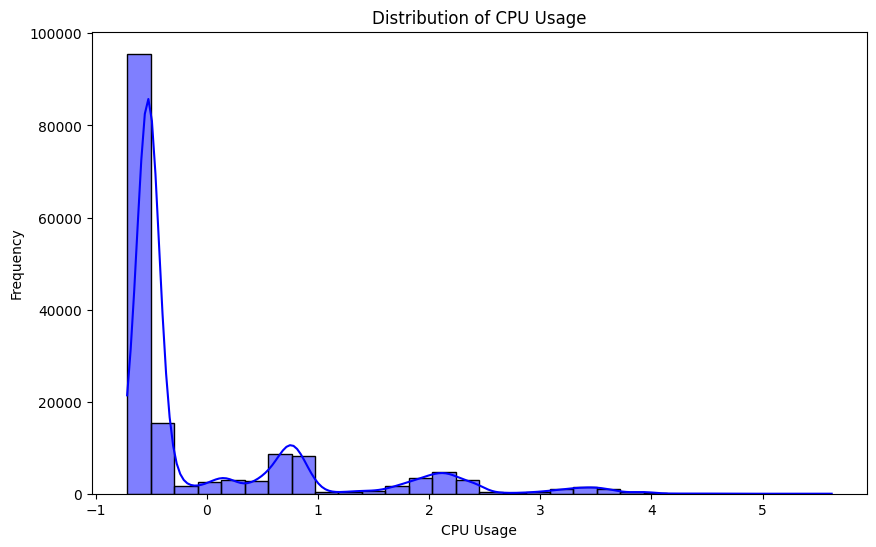

In [16]:
# Convert timestamp to datetime for better time-based plots
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

# 1. Distribution of CPU Usage
plt.figure(figsize=(10, 6))
sns.histplot(dataset['cpuuser'], kde=True, bins=30, color='blue')
plt.title('Distribution of CPU Usage')
plt.xlabel('CPU Usage')
plt.ylabel('Frequency')
plt.show()


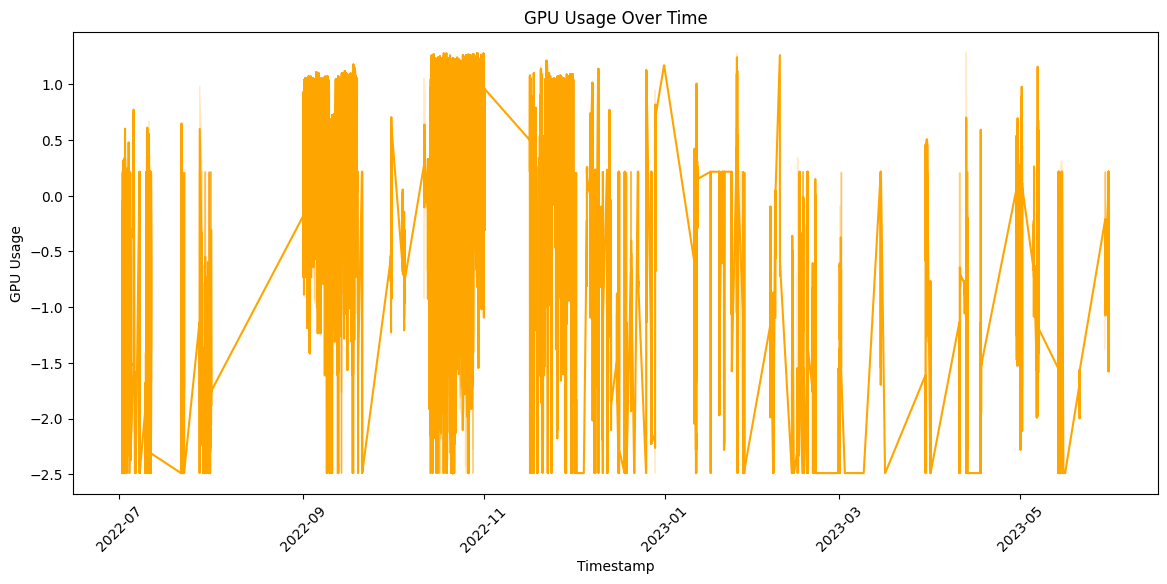

In [17]:
# 2. GPU Usage vs. Time
plt.figure(figsize=(14, 6))
sns.lineplot(data=dataset, x='timestamp', y='gpu_usage', color='orange')
plt.title('GPU Usage Over Time')
plt.xlabel('Timestamp')
plt.ylabel('GPU Usage')
plt.xticks(rotation=45)
plt.show()

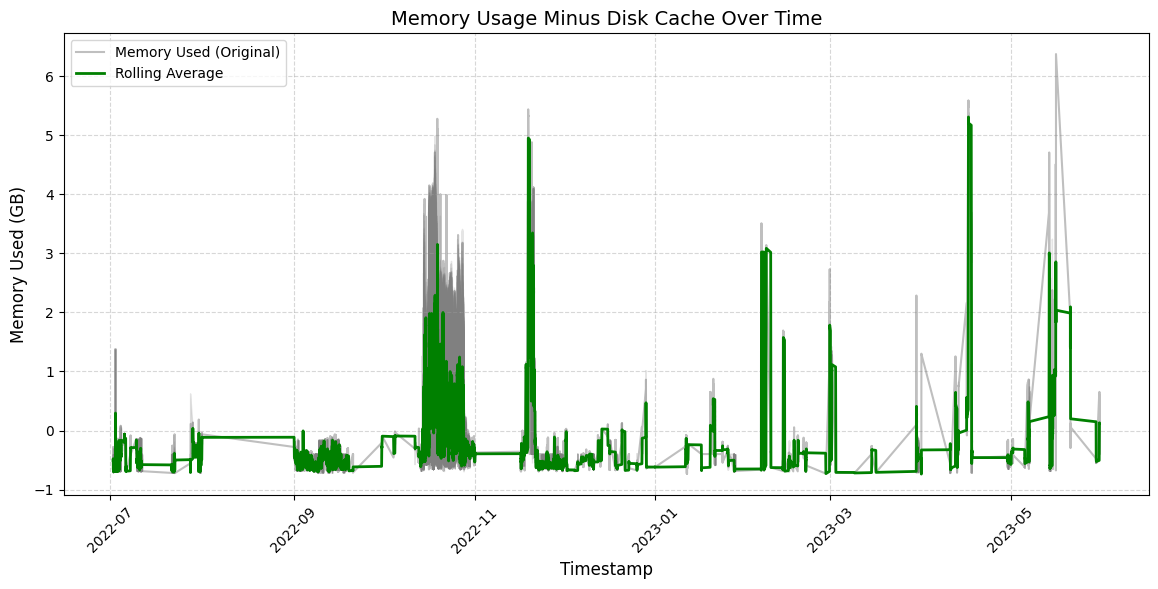

In [18]:
# 6. Memory Usage Minus Disk Cache Over Time with Rolling Average
dataset['memused_minus_diskcache_rolling'] = dataset['memused_minus_diskcache'].rolling(window=50).mean()
plt.figure(figsize=(14, 6))
sns.lineplot(data=dataset, x='timestamp', y='memused_minus_diskcache', label='Memory Used (Original)', color='gray', alpha=0.5)
sns.lineplot(data=dataset, x='timestamp', y='memused_minus_diskcache_rolling', label='Rolling Average', color='green', linewidth=2)
plt.title('Memory Usage Minus Disk Cache Over Time', fontsize=14)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Memory Used (GB)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()

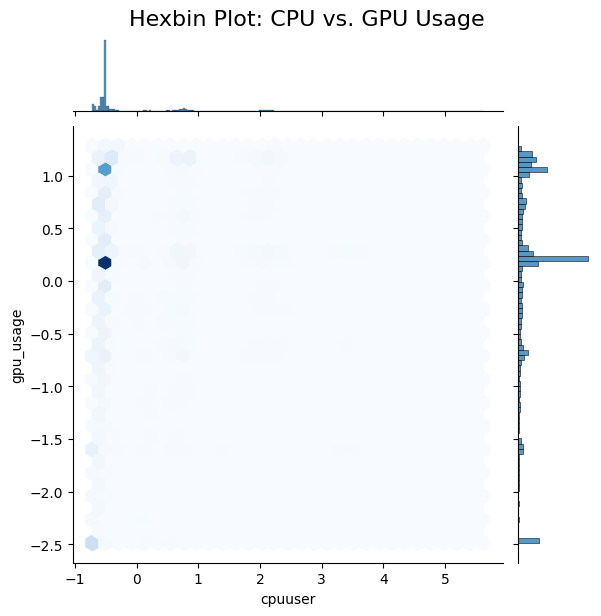

In [19]:
# 9. Joint Plot of CPU and GPU Usage
sns.jointplot(data=dataset, x='cpuuser', y='gpu_usage', kind='hex', gridsize=30, cmap='Blues')
plt.suptitle('Hexbin Plot: CPU vs. GPU Usage', y=1.02, fontsize=16)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
# Convert timestamp to datetime
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

# Fill missing values
dataset.fillna(dataset.mean(numeric_only=True), inplace=True)

# Create target column (classification task)
# Dynamically determine thresholds based on percentiles
cpu_threshold = dataset['cpuuser'].quantile(0.75)  # High CPU usage threshold
gpu_threshold = dataset['gpu_usage'].quantile(0.75)  # High GPU usage threshold

dataset['high_usage'] = np.where((dataset['cpuuser'] > cpu_threshold) | (dataset['gpu_usage'] > gpu_threshold), 1, 0)

# Verify class distribution
print("Class distribution:")
print(dataset['high_usage'].value_counts())

# Drop unnecessary columns
X = dataset.drop(['job_id', 'host', 'timestamp', 'high_usage'], axis=1)
y = dataset['high_usage']

# Ensure there are at least two classes
if len(y.unique()) < 2:
    raise ValueError("The target variable 'high_usage' has fewer than two classes. Adjust thresholds or review data.")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Class distribution:
high_usage
0    88741
1    68328
Name: count, dtype: int64


### Modeling
### Logistic Regression

In [22]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Classification Report Results")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")

Logistic Regression Classification Report Results
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     26622
           1       0.96      0.97      0.97     20499

    accuracy                           0.97     47121
   macro avg       0.97      0.97      0.97     47121
weighted avg       0.97      0.97      0.97     47121

Accuracy: 0.97


### Random Forest

In [23]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Classification Report Results")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")


Random Forest Classification Report Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26622
           1       1.00      1.00      1.00     20499

    accuracy                           1.00     47121
   macro avg       1.00      1.00      1.00     47121
weighted avg       1.00      1.00      1.00     47121

Accuracy: 1.00


### Support Vector Machine

In [24]:
# Support Vector Machine
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("\nSupport Vector Machine Classification Report Results")
print(classification_report(y_test, y_pred_svc))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.2f}")


Support Vector Machine Classification Report Results
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     26622
           1       1.00      0.99      0.99     20499

    accuracy                           0.99     47121
   macro avg       0.99      0.99      0.99     47121
weighted avg       0.99      0.99      0.99     47121

Accuracy: 0.99


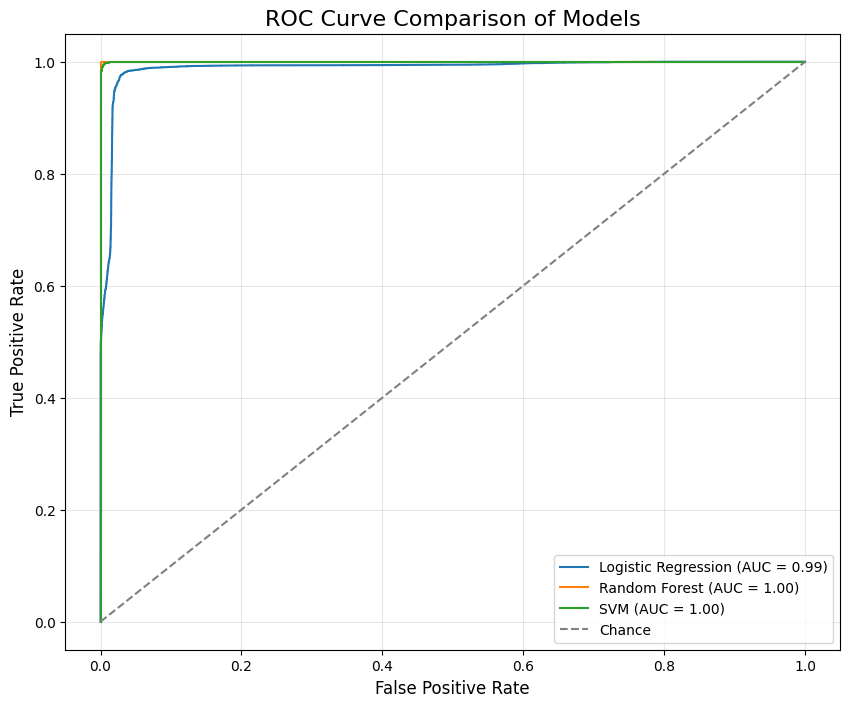

Logistic Regression AUC: 0.99
Random Forest AUC: 1.00
SVM AUC: 1.00


In [25]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Compute ROC and AUC for each model
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "SVM": svc
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):  # For models supporting predict_proba
        y_score = model.predict_proba(X_test)[:, 1]
    else:  # For models like SVM that use decision_function
        y_score = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC curve baseline
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance')

# Customize plot
plt.title("ROC Curve Comparison of Models", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# Print AUC scores for all models
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)
    roc_auc = auc(*roc_curve(y_test, y_score)[:2])
    print(f"{name} AUC: {roc_auc:.2f}")


### Comparison Of Models

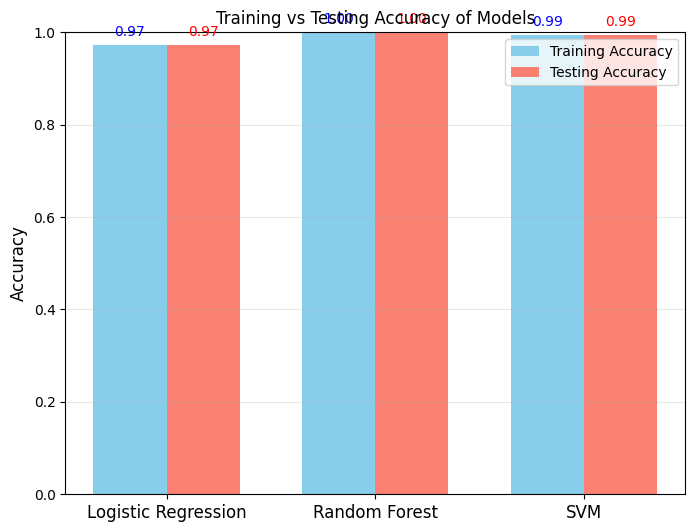

Overfitting Analysis:
Logistic Regression: Training Accuracy = 0.97, Testing Accuracy = 0.97, Gap = -0.00
  -> Logistic Regression generalizes well.
Random Forest: Training Accuracy = 1.00, Testing Accuracy = 1.00, Gap = 0.00
  -> Random Forest generalizes well.
SVM: Training Accuracy = 0.99, Testing Accuracy = 0.99, Gap = -0.00
  -> SVM generalizes well.


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate training and testing accuracies for each model
train_accuracies = []
test_accuracies = []

for name, model in models.items():
    # Calculate training accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Calculate testing accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plot histogram comparison
x = np.arange(len(models))  # Model indices
width = 0.35  # Bar width

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='skyblue')
plt.bar(x + width/2, test_accuracies, width, label='Testing Accuracy', color='salmon')

# Add labels and titles
plt.title("Training vs Testing Accuracy of Models", fontsize=12)
plt.xticks(x, models.keys(), fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Annotate bars
for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies)):
    plt.text(i - width/2, train_acc + 0.02, f"{train_acc:.2f}", ha='center', fontsize=10, color='blue')
    plt.text(i + width/2, test_acc + 0.02, f"{test_acc:.2f}", ha='center', fontsize=10, color='red')

plt.show()

# Print overfitting analysis
print("Overfitting Analysis:")
for name, train_acc, test_acc in zip(models.keys(), train_accuracies, test_accuracies):
    gap = train_acc - test_acc
    print(f"{name}: Training Accuracy = {train_acc:.2f}, Testing Accuracy = {test_acc:.2f}, Gap = {gap:.2f}")
    if gap > 0.1:
        print(f"  -> {name} may be overfitting.")
    else:
        print(f"  -> {name} generalizes well.")
